In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv(r"C:\Users\munee\Desktop\covid.csv")
df.head()

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,DIAGNOSIS_CD,DIAGNOSIS_CD_TYPE,DIAGNOSIS_STATUS,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,Z888,ICD10,Diagnosis of,0,0,0,0.0,N,S0115,2021-03-15
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,I10,ICD10,Diagnosis of,0,0,0,NaN,N,S0115,2020-07-20
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,F0390,ICD10,Diagnosis of,0,0,0,0.0,N,S0106,2020-12-09
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,D631,ICD10,Diagnosis of,0,0,0,0.0,N,S0089,2021-01-22
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,K912,ICD10,Diagnosis of,0,0,0,0.0,N,S0115,2020-11-20


<IPython.core.display.Javascript object>

In [3]:
# df = pd.read_csv(r"C:\Users\munee\Desktop\thesisbothtable.csv")
# df
# del df["Unnamed: 0"]
# df
df["row_num"] = np.arange(len(df))
df

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,DIAGNOSIS_CD_TYPE,DIAGNOSIS_STATUS,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1,row_num
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,ICD10,Diagnosis of,0,0,0,0.0,N,S0115,2021-03-15,0
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,ICD10,Diagnosis of,0,0,0,NaN,N,S0115,2020-07-20,1
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,ICD10,Diagnosis of,0,0,0,0.0,N,S0106,2020-12-09,2
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,ICD10,Diagnosis of,0,0,0,0.0,N,S0089,2021-01-22,3
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,ICD10,Diagnosis of,0,0,0,0.0,N,S0115,2020-11-20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19845,PT743055949,E0000027589915503,94500-6,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,4/18/2021,0:00:00,4/18/2021,10:35:00,4/18/2021,16:14:00,...,ICD10,Diagnosis of,1,0,0,0.0,N,S0078,2021-04-19,19845
19846,PT743140359,E0000027675064153,94500-6,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,NaN,NaN,5/20/2021,8:20:00,5/20/2021,15:36:01,...,ICD10,Diagnosis of,0,0,0,NaN,N,S0115,2021-05-27,19846
19847,PT743247759,E0000028351854097,94500-6,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,8/16/2021,0:00:00,8/16/2021,8:18:00,8/16/2021,14:34:00,...,ICD10,Diagnosis of,0,0,0,1.0,N,S0078,2021-08-17,19847
19848,PT743393479,E0000027589917305,94500-6,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,4/22/2021,0:00:00,4/25/2021,8:17:00,4/25/2021,13:48:00,...,ICD10,Diagnosis of,0,0,0,0.0,N,S0078,2021-04-26,19848


<IPython.core.display.Javascript object>

In [4]:
df["TEST_RESULT_Dummy"] = np.where(df["TEST_RESULT"] == "POSITIVE", 1, 0)
df.head()

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,DIAGNOSIS_STATUS,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1,row_num,TEST_RESULT_Dummy
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,Diagnosis of,0,0,0,0.0,N,S0115,2021-03-15,0,0
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,Diagnosis of,0,0,0,NaN,N,S0115,2020-07-20,1,0
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,Diagnosis of,0,0,0,0.0,N,S0106,2020-12-09,2,0
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,Diagnosis of,0,0,0,0.0,N,S0089,2021-01-22,3,1
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,Diagnosis of,0,0,0,0.0,N,S0115,2020-11-20,4,0


<IPython.core.display.Javascript object>

In [5]:
df["DIAGNOSIS_CD_Dummy"] = np.where(df["DIAGNOSIS_CD"] == "U071", 1, 0)
df.head()

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1,row_num,TEST_RESULT_Dummy,DIAGNOSIS_CD_Dummy
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,0,0,0,0.0,N,S0115,2021-03-15,0,0,0
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,0,0,0,NaN,N,S0115,2020-07-20,1,0,0
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,0,0,0,0.0,N,S0106,2020-12-09,2,0,0
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,0,0,0,0.0,N,S0089,2021-01-22,3,1,0
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,0,0,0,0.0,N,S0115,2020-11-20,4,0,0


<IPython.core.display.Javascript object>

In [6]:
# see full table
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.set_option("display.width", None)
# pd.set_option("display.max_colwidth", None)

<IPython.core.display.Javascript object>

In [7]:
# calculate a
tp = df.loc[(df["DIAGNOSIS_CD"] == "U071") & (df["TEST_RESULT"] == "POSITIVE")]
tp
len(tp)

165

<IPython.core.display.Javascript object>

In [8]:
# calculate C
fn = df.loc[(df["DIAGNOSIS_CD"] == "U071") & (df["TEST_RESULT"] == "NEGATIVE")]
fn
len(fn)

32

<IPython.core.display.Javascript object>

In [9]:
# calculate d
fp = df.loc[(df["DIAGNOSIS_CD"] != "U071") & (df["TEST_RESULT"] == "NEGATIVE")]
fp
len(fp)

18385

<IPython.core.display.Javascript object>

In [10]:
# calculate b
tn = df.loc[(df["DIAGNOSIS_CD"] != "U071") & (df["TEST_RESULT"] == "POSITIVE")]
tn
len(tn)

1268

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19850 entries, 0 to 19849
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PTID                 19850 non-null  object 
 1   ENCID                18032 non-null  object 
 2   TEST_CODE            892 non-null    object 
 3   TEST_NAME            19850 non-null  object 
 4   ORDER_DATE           16718 non-null  object 
 5   ORDER_TIME           16718 non-null  object 
 6   COLLECTED_DATE       19785 non-null  object 
 7   COLLECTED_TIME       19785 non-null  object 
 8   RESULT_DATE          19850 non-null  object 
 9   RESULT_TIME          19850 non-null  object 
 10  TEST_RESULT          19850 non-null  object 
 11  CORONAVIRUS          19850 non-null  int64  
 12  SARS                 19850 non-null  int64  
 13  MERS                 19850 non-null  int64  
 14  COVID                19850 non-null  int64  
 15  PCR                  19850 non-null 

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd

df5 = pd.DataFrame({"value": ["POSITIVE", "NEGATIVE"]})
df5.value.eq("POSITIVE").astype(int)
df5.value.eq("NEGATIVE").astype(int)
df5.columns = ["TEST_RESULT"]
df5
df.append(df5)
df.head()

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1,row_num,TEST_RESULT_Dummy,DIAGNOSIS_CD_Dummy
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,0,0,0,0.0,N,S0115,2021-03-15,0,0,0
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,0,0,0,NaN,N,S0115,2020-07-20,1,0,0
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,0,0,0,0.0,N,S0106,2020-12-09,2,0,0
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,0,0,0,0.0,N,S0089,2021-01-22,3,1,0
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,0,0,0,0.0,N,S0115,2020-11-20,4,0,0


<IPython.core.display.Javascript object>

In [13]:
df6 = pd.DataFrame({"value": ["U071", "=!U071"]})
df6.value.eq("U071").astype(int)
df6.value.eq("=!U071").astype(int)
df6.columns = ["DIAGNOSIS_CD"]
df6

,DIAGNOSIS_CD
0,U071
1,=!U071


<IPython.core.display.Javascript object>

In [14]:
df.append(df5)
df.head()
df.append(df6)
df.head()

,PTID,ENCID,TEST_CODE,TEST_NAME,ORDER_DATE,ORDER_TIME,COLLECTED_DATE,COLLECTED_TIME,RESULT_DATE,RESULT_TIME,...,POA,ADMITTING_DIAGNOSIS,DISCHARGE_DIAGNOSIS,PRIMARY_DIAGNOSIS,PROBLEM_LIST,SOURCEID,diagdate1,row_num,TEST_RESULT_Dummy,DIAGNOSIS_CD_Dummy
0,PT078418319,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,2/24/2021,15:49:11,3/10/2021,9:06:00,3/11/2021,05:01:00,...,0,0,0,0.0,N,S0115,2021-03-15,0,0,0
1,PT078998089,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,7/14/2020,12:23:45,7/16/2020,10:43:00,7/17/2020,14:22:00,...,0,0,0,NaN,N,S0115,2020-07-20,1,0,0
2,PT080783919,E0000025777187584,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,12/8/2020,13:38:00,12/8/2020,13:38:00,12/8/2020,22:11:00,...,0,0,0,0.0,N,S0106,2020-12-09,2,0,0
3,PT081100989,E0000027207268454,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,1/21/2021,22:37:00,1/21/2021,23:17:00,1/21/2021,23:17:00,...,0,0,0,0.0,N,S0089,2021-01-22,3,1,0
4,PT081825349,NaN,NaN,SARS CORONAVIRUS 2 RNA (COVID-19).RESPIRATORY,11/13/2020,18:15:25,NaN,NaN,11/15/2020,10:00:00,...,0,0,0,0.0,N,S0115,2020-11-20,4,0,0


<IPython.core.display.Javascript object>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19850 entries, 0 to 19849
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PTID                 19850 non-null  object 
 1   ENCID                18032 non-null  object 
 2   TEST_CODE            892 non-null    object 
 3   TEST_NAME            19850 non-null  object 
 4   ORDER_DATE           16718 non-null  object 
 5   ORDER_TIME           16718 non-null  object 
 6   COLLECTED_DATE       19785 non-null  object 
 7   COLLECTED_TIME       19785 non-null  object 
 8   RESULT_DATE          19850 non-null  object 
 9   RESULT_TIME          19850 non-null  object 
 10  TEST_RESULT          19850 non-null  object 
 11  CORONAVIRUS          19850 non-null  int64  
 12  SARS                 19850 non-null  int64  
 13  MERS                 19850 non-null  int64  
 14  COVID                19850 non-null  int64  
 15  PCR                  19850 non-null 

<IPython.core.display.Javascript object>

Diagnosis        0    1
Test Result            
0            18385   32
1             1268  165


Confusion Matrix LR
[[5514   11]
 [ 374   56]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5525
           1       0.84      0.13      0.23       430

    accuracy                           0.94      5955
   macro avg       0.89      0.56      0.60      5955
weighted avg       0.93      0.94      0.91      5955



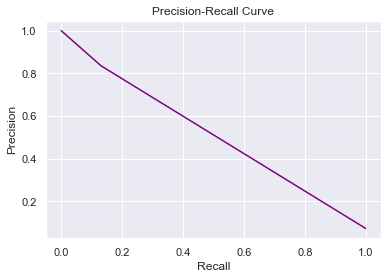

Precision:  0.835820895522388
Recall:  0.13023255813953488
Logistic: f1=0.193 auc=0.488


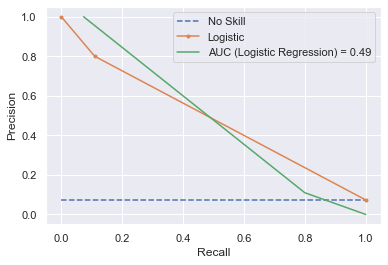

Random Forest: f1=0.193 auc=0.488


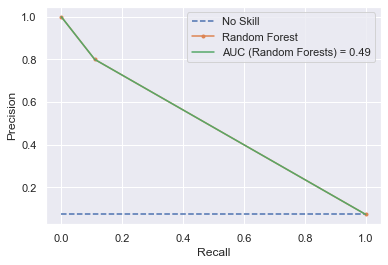

<IPython.core.display.Javascript object>

In [50]:
# statology
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# raw confusion matrix
df = pd.DataFrame(df, columns=["DIAGNOSIS_CD_Dummy", "TEST_RESULT_Dummy"])
confusion_matrix = pd.crosstab(
    df["TEST_RESULT_Dummy"],
    df["DIAGNOSIS_CD_Dummy"],
    rownames=["Test Result"],
    colnames=["Diagnosis"],
)
print(confusion_matrix)


# Logistic Regression Confusion Matrix
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics

X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
# X = pd.DataFrame(df.iloc[:, -1])
# y = pd.DataFrame(df.iloc[:, :-1])


# split into training and test using scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.3, random_state=1, stratify=y
)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# use logistic regression model to make predictions
y_score = log_model.predict_proba(X_test)[:, 1]

y_pred = log_model.predict(X_test)
y_pred = np.round(y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n")
print("Confusion Matrix LR")
print(confusion_matrix)
print("\n")
print(classification_report(y_test, y_pred, zero_division=0))

# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color="purple")

# add axis labels to plot
ax.set_title("Precision-Recall Curve")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")

# display plot
plt.show()

# precision-recall curve
# generate 2 class dataset
X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]

# X = pd.DataFrame(df.iloc[:, :-1])
# y = pd.DataFrame(df.iloc[:, -1])

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(
    X, y.values.ravel(), test_size=0.3, random_state=2
)
# fit a model
model = LogisticRegression(solver="lbfgs")
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
# probs_rf = model_rf.predict_proba(testX)[:, 1]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# precision_rf, recall_rf, _ = precision_recall_curve(testy, probs_rf)
# f1_rf, auc_rf = f1_score(testy, yhat), auc(recall_rf, precision_rf)
# auc_rf = auc(recall_rf, precision_rf)

pred = model.predict(X_test)

# calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Precision: ", precision)
print("Recall: ", recall)


# summarize scores
print("Logistic: f1=%.3f auc=%.3f" % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(testy[testy == 1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
pyplot.plot(lr_recall, lr_precision, marker=".", label="Logistic")

plt.plot(lr_precision, lr_recall, label=f"AUC (Logistic Regression) = {lr_auc:.2f}")

# axis labels
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## Random Forest ##
#model_rf = RandomForestClassifier()
#model_rf.fit(trainX, trainy)
# model_rf = RandomForestClassifier().fit(trainX, trainy)

# predict probabilities
#lr_probs = model.predict_proba(testX)
#probs_rf = model_rf.predict_proba(testX)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]

# predict class values
#yhat = model.predict(testX)
#precision_rf, recall_rf, _ = precision_recall_curve(testy, probs_rf)
#f1_rf, auc_rf = f1_score(testy, yhat), auc(recall_rf, precision_rf)
#auc_rf = auc(recall_rf, precision_rf)

#print("Random Forest: f1=%.3f auc=%.3f" % (f1_rf, auc_rf))

# plot the precision-recall curves
#no_skill = len(testy[testy == 1]) / len(testy)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
#pyplot.plot(lr_recall, lr_precision, marker=".", label="Random Forest")

#plt.plot(recall_rf, precision_rf, label=f"AUC (Random Forests) = {auc_rf:.2f}")

# axis labels
#pyplot.xlabel("Recall")
#pyplot.ylabel("Precision")
# show the legend
#pyplot.legend()
# show the plot
#pyplot.show()

Test Result


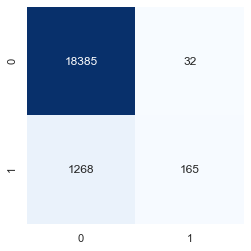

<IPython.core.display.Javascript object>

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, X)
sns.heatmap(conf_mat, square=True, annot=True, cmap="Blues", fmt="d", cbar=False)
print("Test Result")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19850 entries, 0 to 19849
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DIAGNOSIS_CD_Dummy  19850 non-null  int32
 1   TEST_RESULT_Dummy   19850 non-null  int32
dtypes: int32(2)
memory usage: 155.2 KB


<IPython.core.display.Javascript object>

In [19]:
df.head()

,DIAGNOSIS_CD_Dummy,TEST_RESULT_Dummy
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


<IPython.core.display.Javascript object>

In [20]:
pip install -U notebook-as-pdf

ERROR:root:Cannot parse: 1:4: pip install -U notebook-as-pdf
Traceback (most recent call last):
  File "C:\Users\munee\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\munee\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "C:\Users\munee\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "C:\Users\munee\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install -U notebook-as-pdf


Note: you may need to restart the kernel to use updated packages.


In [21]:
jupyter-nbconvert --to PDFviaHTML df.ipynb

SyntaxError: invalid syntax (<ipython-input-21-3a40123d7dba>, line 1)

ERROR:root:Cannot parse: 1:23: jupyter-nbconvert --to PDFviaHTML df.ipynb
Traceback (most recent call last):
  File "C:\Users\munee\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\munee\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "C:\Users\munee\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "C:\Users\munee\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:23: jupyter-nbconvert --to PDFviaHTML df.ipynb


In [22]:
import os

os.environ["PATH"].split(";")

['C:\\Users\\munee\\anaconda3',
 'C:\\Users\\munee\\anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\munee\\anaconda3\\Library\\usr\\bin',
 'C:\\Users\\munee\\anaconda3\\Library\\bin',
 'C:\\Users\\munee\\anaconda3\\Scripts',
 'C:\\Users\\munee\\anaconda3\\bin',
 'C:\\Users\\munee\\anaconda3\\condabin',
 'C:\\Users\\munee\\anaconda3',
 'C:\\Users\\munee\\anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\munee\\anaconda3\\Library\\usr\\bin',
 'C:\\Users\\munee\\anaconda3\\Library\\bin',
 'C:\\Users\\munee\\anaconda3\\Scripts',
 'C:\\Windows\\system32',
 'C:\\Windows',
 'C:\\Windows\\System32\\Wbem',
 'C:\\Windows\\System32\\WindowsPowerShell\\v1.0',
 'C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common',
 'C:\\WINDOWS\\system32',
 'C:\\WINDOWS',
 'C:\\WINDOWS\\System32\\Wbem',
 'C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0',
 'C:\\WINDOWS\\System32\\OpenSSH',
 'C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL',
 'C:\\Program Files\\Intel\\Intel(R) Man

<IPython.core.display.Javascript object>

In [ ]:
#using Random Forest



Diagnosis        0    1
Test Result            
0            18385   32
1             1268  165




RF Confusion Matrix
[[9191   18]
 [ 637   79]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9209
           1       0.81      0.11      0.19       716

    accuracy                           0.93      9925
   macro avg       0.87      0.55      0.58      9925
weighted avg       0.93      0.93      0.91      9925

Random Forest: f1=0.194 auc=0.494
Precision:  0.8144329896907216
Recall:  0.11033519553072625


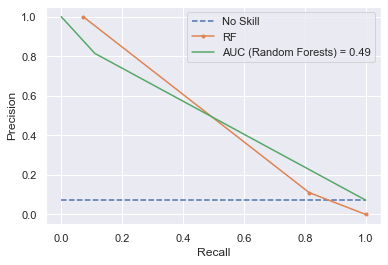

IndexError: invalid index to scalar variable.

<IPython.core.display.Javascript object>

In [76]:
# statology
from numpy import argmax
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# raw confusion matrix
df = pd.DataFrame(df, columns=["DIAGNOSIS_CD_Dummy", "TEST_RESULT_Dummy"])
confusion_matrix = pd.crosstab(
    df["TEST_RESULT_Dummy"],
    df["DIAGNOSIS_CD_Dummy"],
    rownames=["Test Result"],
    colnames=["Diagnosis"],
)
print("\n")
print(confusion_matrix)
print("\n")

# RF Confusion Matrix
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
# X = pd.DataFrame(df.iloc[:, -1])
# y = pd.DataFrame(df.iloc[:, :-1])


# split into training and test using scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.5, random_state=2, stratify=y
)


# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
# model_rf = RandomForestClassifier().fit(trainX, trainy)

# use RF model to make predictions
y_score = model_rf.predict_proba(X_test)[:, 1]

y_pred_test = model_rf.predict(X_test)
y_pred = np.round(y_pred_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n")
print("RF Confusion Matrix")
print(confusion_matrix)
print("\n")
print(classification_report(y_test, y_pred, zero_division=0))

# predict probabilities
probs_rf = model_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]

# predict class values
yhat = model_rf.predict(X_test)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
f1_rf, auc_rf = f1_score(y_test, yhat), auc(recall_rf, precision_rf)
auc_rf = auc(recall_rf, precision_rf)

print("Random Forest: f1=%.3f auc=%.3f" % (f1_rf, auc_rf))

pred = model_rf.predict(X_test)

# calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Precision: ", precision)
print("Recall: ", recall)

# plot the precision-recall curves
no_skill = len(y_test[y_test == 1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
# pyplot.plot(lr_recall, lr_precision, marker=".", label="LR")
pyplot.plot(precision_rf, recall_rf, marker=".", label="RF")

# plt.plot(lr_precision, lr_recall, label=f"AUC (Logistic Regression) = {lr_auc:.2f}")
plt.plot(recall_rf, precision_rf, label=f"AUC (Random Forests) = {auc_rf:.2f}")

# axis labels
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()





Diagnosis        0    1
Test Result            
0            18385   32
1             1268  165




RF Confusion Matrix
[[5515   10]
 [ 390   40]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5525
           1       0.80      0.09      0.17       430

    accuracy                           0.93      5955
   macro avg       0.87      0.55      0.57      5955
weighted avg       0.92      0.93      0.91      5955

Random Forest: f1=0.167 auc=0.479
Precision:  0.8
Recall:  0.09302325581395349


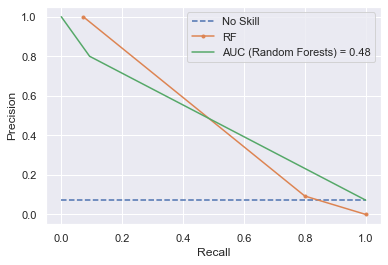

Best Threshold=0.001000, F-Score=0.167


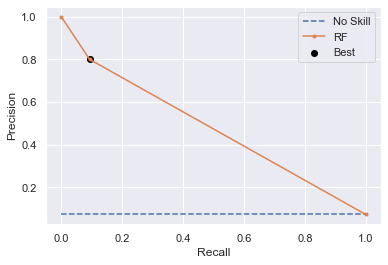

Threshold=0.064, F-Score=0.16667


<IPython.core.display.Javascript object>

In [90]:
# trial 2: finding best threshold

from numpy import arange
from numpy import argmax
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# raw confusion matrix
df = pd.DataFrame(df, columns=["DIAGNOSIS_CD_Dummy", "TEST_RESULT_Dummy"])
confusion_matrix = pd.crosstab(
    df["TEST_RESULT_Dummy"],
    df["DIAGNOSIS_CD_Dummy"],
    rownames=["Test Result"],
    colnames=["Diagnosis"],
)
print("\n")
print(confusion_matrix)
print("\n")

# RF Confusion Matrix
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
# X = pd.DataFrame(df.iloc[:, -1])
# y = pd.DataFrame(df.iloc[:, :-1])


# split into training and test using scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.3, random_state=2, stratify=y
)


# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
# model_rf = RandomForestClassifier().fit(trainX, trainy)

# use RF model to make predictions
y_score = model_rf.predict_proba(X_test)[:, 1]

y_pred_test = model_rf.predict(X_test)
y_pred = np.round(y_pred_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n")
print("RF Confusion Matrix")
print(confusion_matrix)
print("\n")
print(classification_report(y_test, y_pred, zero_division=0))

# predict probabilities
probs_rf = model_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]

# predict class values
yhat = model_rf.predict(X_test)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
f1_rf, auc_rf = f1_score(y_test, yhat), auc(recall_rf, precision_rf)
auc_rf = auc(recall_rf, precision_rf)

print("Random Forest: f1=%.3f auc=%.3f" % (f1_rf, auc_rf))

pred = model_rf.predict(X_test)

# calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print("Precision: ", precision)
print("Recall: ", recall)

# plot the precision-recall curves
no_skill = len(y_test[y_test == 1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
# pyplot.plot(lr_recall, lr_precision, marker=".", label="LR")
pyplot.plot(precision_rf, recall_rf, marker=".", label="RF")

# plt.plot(lr_precision, lr_recall, label=f"AUC (Logistic Regression) = {lr_auc:.2f}")
plt.plot(recall_rf, precision_rf, label=f"AUC (Random Forests) = {auc_rf:.2f}")

# axis labels
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# predict probabilities
yhat = model_rf.predict_proba(X_test)
probs_rf = model_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
probs_rf = probs_rf[:, 1]

# calculate curves
precision, recall, thresholds_rf = precision_recall_curve(y_test, yhat)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
# f1_rf, auc_rf = f1_score(y_test, yhat), auc(recall_rf, precision_rf)
# auc_rf = auc(recall_rf, precision_rf)

# find best optimal threshold for PR curve
# convert to f score

fscore = (2 * precision_rf * recall_rf) / (precision_rf + recall_rf)
# locate the index of the largest f score
ix = argmax(fscore)
print("Best Threshold=%f, F-Score=%.3f" % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test == 1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
pyplot.plot(recall_rf, precision_rf, marker=".", label="RF")
pyplot.scatter(recall_rf[ix], precision_rf[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
pyplot.legend()
# show the plot
pyplot.show()


# optimal threshold tuning

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype("int")


# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs_rf, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print("Threshold=%.3f, F-Score=%.5f" % (thresholds[ix], scores[ix]))

In [100]:
# optimal threshold tuning

# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype("int")


# generate dataset
X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
# X = pd.DataFrame(df.iloc[:, -1])
# y = pd.DataFrame(df.iloc[:, :-1])


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(
    X, y.values.ravel(), test_size=0.5, shuffle=True, random_state=2, stratify=y
)
# fit a model
model_rf = RandomForestClassifier()
model_rf.fit(trainX, trainy)
# predict probabilities
yhat = model_rf.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print("Threshold=%.3f, F-Score=%.5f" % (thresholds[ix], scores[ix]))

Threshold=0.065, F-Score=0.19434


<IPython.core.display.Javascript object>

In [96]:
# trial 3: adding cross validation (k-fold)

from numpy import arange
from numpy import argmax
from sklearn.preprocessing import MultiLabelBinarizer as mlb
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# split into training and test using scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.3, shuffle=True, random_state=2, stratify=y
)

# raw confusion matrix
df = pd.DataFrame(df, columns=["DIAGNOSIS_CD_Dummy", "TEST_RESULT_Dummy"])
confusion_matrix = pd.crosstab(
    df["TEST_RESULT_Dummy"],
    df["DIAGNOSIS_CD_Dummy"],
    rownames=["Test Result"],
    colnames=["Diagnosis"],
)
print("\n")
print(confusion_matrix)
print("\n")

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_train, y_train, cv=5))

import numpy as np
print(np.mean(cross_val_score(model, X_train, y_train, cv=5)))





Diagnosis        0    1
Test Result            
0            18385   32
1             1268  165


[[5515   10]
 [ 390   40]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5525
           1       0.80      0.09      0.17       430

    accuracy                           0.93      5955
   macro avg       0.87      0.55      0.57      5955
weighted avg       0.92      0.93      0.91      5955

[0.93630802 0.93558834 0.9352285  0.93594818 0.93306945]
0.9352284994602375


<IPython.core.display.Javascript object>

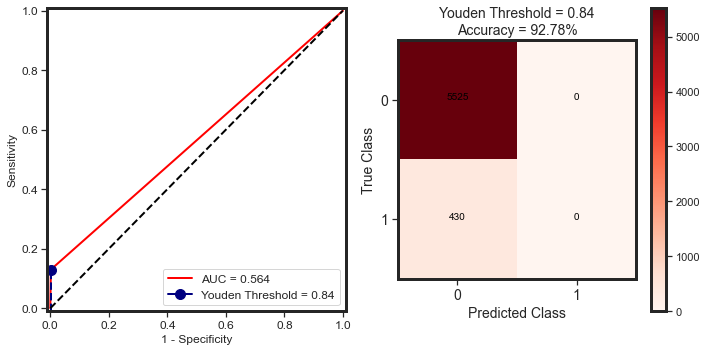

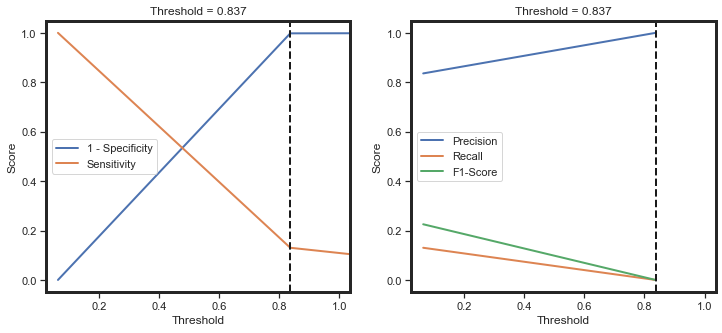

<IPython.core.display.Javascript object>

In [111]:
# trial 4   https://amirhessam88.github.io/finding-thresholds/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interp
from sklearn.preprocessing import scale
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    average_precision_score,
    precision_recall_curve,
)
from sklearn.model_selection import (
    cross_val_score,
    KFold,
    StratifiedKFold,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

import seaborn as sns

sns.set_style("ticks")
mpl.rcParams["axes.linewidth"] = 3
mpl.rcParams["lines.linewidth"] = 2
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Function: _model


def _clf_train(
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    min_child_weight=5.0,
    gamma=1,
    reg_alpha=0.0,
    reg_lambda=1.0,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    nthread=4,
    scale_pos_weight=1.0,
    seed=1367,
    random_state=1367,
):
    """
    a RF model for training
    """

    clf = RandomForestClassifier()

    clf.fit(
        X_train,
        y_train
        # eval_metric="auc",
        # early_stopping_rounds=20,
        # verbose=True,
        # eval_set=[(X_test, y_test)],
    )

    return clf


# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Function: Finding thresholds
def _threshold_finder(model, X, y_true):
    """
    a function to find the optimal threshold for binary classification
    model: a trained model object (such as xgboost, glmnet, ...)
    X: the test set of features (pandas dataframe or numpy array)
    y_true: the true class labels (list or array of 0's and 1's)    
    """

    y_predict_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba)
    auc = roc_auc_score(y_true, y_predict_proba)
    precision, recall, thresholds2 = precision_recall_curve(y_true, y_predict_proba)

    class_names = [0, 1]
    youden_idx = np.argmax(np.abs(tpr - fpr))
    youden_threshold = thresholds[youden_idx]
    y_pred_youden = (y_predict_proba > youden_threshold).astype(int)
    cnf_matrix = confusion_matrix(y_true, y_pred_youden)
    np.set_printoptions(precision=2)

    f1 = []
    for i in range(len(precision)):
        f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color="red", label=f"AUC = {auc:.3f}")
    plt.plot(
        fpr[youden_idx],
        tpr[youden_idx],
        marker="o",
        color="navy",
        ms=10,
        label=f"Youden Threshold = {youden_threshold:.2f}",
    )
    plt.axvline(
        x=fpr[youden_idx],
        ymin=fpr[youden_idx],
        ymax=tpr[youden_idx],
        color="navy",
        ls="--",
    )
    plt.plot([0, 1], [0, 1], color="black", ls="--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("1 - Specificity", fontsize=12)
    plt.ylabel("Sensitivity", fontsize=12)
    plt.tick_params(axis="both", which="major", labelsize=12)
    plt.legend(prop={"size": 12}, loc=4)

    plt.subplot(1, 2, 2)
    _plot_confusion_matrix(
        cnf_matrix,
        classes=class_names,
        normalize=False,
        cmap=plt.cm.Reds,
        title=f"Youden Threshold = {youden_threshold:.2f}\nAccuracy = {accuracy_score(y_true, y_pred_youden)*100:.2f}%",
    )
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(thresholds, 1 - fpr, label="1 - Specificity")
    plt.plot(thresholds, tpr, label="Sensitivity")
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(loc=0)
    plt.xlim([0.025, thresholds[np.argmin(abs(tpr + fpr - 1))] + 0.2])
    plt.axvline(thresholds[np.argmin(abs(tpr + fpr - 1))], color="k", ls="--")
    plt.title(
        f"Threshold = {thresholds[np.argmin(abs(tpr + fpr - 1))]:.3f}", fontsize=12
    )

    plt.subplot(1, 2, 2)
    plt.plot(thresholds2, precision[1:], label="Precision")
    plt.plot(thresholds2, recall[1:], label="Recall")
    plt.plot(thresholds2, f1[1:], label="F1-Score")
    # plt.plot(thresholds2, queue_rate, label="Queue Rate")
    plt.legend(loc=0)
    plt.xlim([0.025, thresholds2[np.argmin(abs(precision - recall))] + 0.2])
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.axvline(thresholds2[np.argmin(abs(precision - recall))], color="k", ls="--")
    plt.title(
        label=f"Threshold = {thresholds2[np.argmin(abs(precision-recall))]:.3f}",
        fontsize=12,
    )
    plt.show()


# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Function: Plotting Confusion Matrix
def _plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Greens
):
    from sklearn.metrics import (
        precision_score,
        recall_score,
        roc_auc_score,
        accuracy_score,
        roc_curve,
        auc,
        confusion_matrix,
    )
    import itertools

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black"
        )

    plt.ylabel("True Class", fontsize=14)
    plt.xlabel("Predicted Class", fontsize=14)

    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.tight_layout()


X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
# X = pd.DataFrame(df.iloc[:, -1])
# y = pd.DataFrame(df.iloc[:, :-1])


# split into training and test using scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.3, random_state=1, stratify=y
)

model = _clf_train(X_train, y_train, X_test, y_test)

_threshold_finder(model=model, X=X_test, y_true=y_test)

In [116]:
# trial 5
import numpy as np

X = df[["DIAGNOSIS_CD_Dummy"]]
y = df[["TEST_RESULT_Dummy"]]
X = (X - np.min(X)) / (np.max(X) - np.min(X))


def RandomForestClassifier(X, thres=0.5):
    predicted = np.zeros(len(X))
    for i in range(len(X)):
        if X[i] < thres:
            predicted[i] = 1
    return predicted


def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = (TP) / (TP + FP)
    recall = (TP) / (TP + FN)
    f1_score = (2 * precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1_score


thresh = np.linspace(0, 1, 20)
accuracy = np.zeros(len(thresh))
precision = np.zeros(len(thresh))
recall = np.zeros(len(thresh))
f1_score = np.zeros(len(thresh))

print("Threshold \t Accuracy \t Precision\t Recall \t  F1 Score ")

for i in range(len(thresh)):
    prediction = RandomForestClassifier(X, thresh[i])
    accuracy[i], precision[i], recall[i], f1_score[i] = calculate_metrics(prediction, y)
    print(
        f"{thresh[i]: .2f}\t\t {accuracy[i]: .2f}\t\t {precision[i]: .2f}\t\t {recall[i]: .2f}\t\t {f1_score[i]: .2f}"
    )

import matplotlib.pyplot as plt

plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision versus Recall")
plt.show()

plt.plot(thresh, accuracy, "r")
plt.plot(thresh, precision, "g")
plt.plot(thresh, recall, "b")
plt.plot(thresh, f1_score, "k")

plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.xlabel("Threshold")
plt.ylabel("Scores")
plt.title("Change of Evaluation Metrics according to Threshold")

plt.show()

Threshold 	 Accuracy 	 Precision	 Recall 	  F1 Score 


KeyError: 0

<IPython.core.display.Javascript object>